# CENSUS11 DATA PROJECT: An Analysis of a Town Population Data

## 1. INTRODUCTION

In this analysis loaded a CSV data for the census11 dataset to be used. Then I performed various cleaning and analysis with it using Python libraries to get insights about the population and draw some conclusion.

## CONTENTS

1. [INTRODUCTION](#1.-INTRODUCTION)
2. [DATA GATHERING](#2.-DATA-GATHERING)
3. [DATA CLEANING](#3.-DATA-CLEANING)<br>
   3a. [DEALING WITH DATA TYPE](#3a.-Dealing-with-data-types)<br>
   3b. [DEALING WITH MISSING VALUES](#3b.-Dealing-with-missing-values)<br>
   3c. [CLEANING RELATIONSHIP TO HEAD OF HOUSE COLUMN](#3c.-Cleaning-'Relationship-to-head-of-house'-column)<br>
   3d. [CLEANING INFIRMITY ROW](#3d.-Cleaning-'Infirmity'-row)<br>
   3e. [CLEANING FIRST NAME COLUMN](#3e.-Cleaning-'First-Name'-column)
4. [EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION](#4.-Exploratory-Data-Analysis-and-Data-Visualization)<br>
   4a. [EXAMINING AGE DISTRIBUTION](#4a.-Examining-Age-distribution)<br>
   4b. [CALCULATING DEATH RATE AND BIRTH RATE](#4b.-Calculating-death-rate-and-Birth-rate)<br>
   4c. [EXAMINING THE NUMBER OF UNIVERSITY STUDENT, RETIREMENT AGE AND MINIMUM AGE FOR SCHOOL](#4c.-Examining-the-number-of-University-Student,-Retirement-age-and-Minimum-Age-for-School)<br>
   4d. [EXAMINING UNEMPLOYMENT TREND](#4d.-Examining-Unemployment-trend)<br>
   4e. [EXAMINING RELIGION TREND](#4e.-Examining-Religion-trend)<br>
   4f. [EXAMINING THE MARRIAGE AND DIVORCED RATE](#4f.-Examining-the-Marriage-and-Divorced-rate)<br>
   4g. [EXAMINING OCCCUPANCY LEVEL](#4g.-Examining-Occupancy-Level)
   
   
   
   
   


## 2. DATA GATHERING

In [1255]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1256]:
# Assigning a variable to the DataFrame
census_data = pd.read_csv('census11.csv')

## 3. DATA CLEANING

In [1257]:
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,NaN,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,NaN,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,NaN,NaN
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,NaN,Methodist
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,NaN,Catholic


In [1258]:
# Get the shape of the data
census_data.shape

(8377, 11)

In [1259]:
# Get data information to check for number of missing values per column
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  7778 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      69 non-null     object
 10  Religion                       3525 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


In [1260]:
# Get data types of each columns
census_data.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

### 3a. Dealing with data types

From the above some of the columns are not in the proper data types
* House number should be in string and not integer because the can contain leading zeros (e.g 001), can be alphanumeric and are used as identifiers
* Age should be changed to integer as its a numerical quantity and can be measured.
* Gender and Marital status will be converted to categorical type


In [1261]:
# Convert House Number to string/object
census_data['House Number'] = census_data['House Number'].astype('str')

In [1262]:
# Confirming the above conversion
assert census_data['House Number'].dtype == 'object'

I tried converting Age to float using the method in the above cell but gave error "could not convert string to float: ''". I will then use the .loc[] method to search for the row(s) with '' value in the age column.

In [1263]:
empty_age_rows = census_data.loc[census_data['Age'] == ' ']
print(empty_age_rows)

     House Number          Street First Name Surname Age   
4000            6  Pendragon Lane     Howard   Baker      \

     Relationship to Head of House Marital Status Gender          Occupation   
4000                           Son         Single   Male  University Student  \

     Infirmity   Religion  
4000       NaN  Methodist  


Just one row was found. I since the person is a university student I will replace his age with the median age between 18 - 22 which is the age most university student are found. This value is 20.

In [1264]:
## The Age column is object type so I will replace it with '20'
census_data['Age'].replace(' ', '20', inplace=True)

In [1265]:
## I will attempt again to convert it to float
census_data['Age'] = census_data['Age'].astype('float')

In [1266]:
## Then convert to integer.  
census_data['Age'] = census_data['Age'].astype('int')

### 3b. Dealing with missing values

* Marital Status have 1974 missing values 
* Religion has 2012 missing values
* Occupation, Infirmity have empty values (' ') in some rows  

In [1267]:
## Checking unique values of Marital Status
census_data['Marital Status'].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', ' '], dtype=object)

On inspecting the data rows with nan are under 18. Marital status dooes not apply to them 

In [1268]:
# Using .loc method to search for rows with ' '
empty_marital_rows = census_data.loc[census_data['Marital Status'] == ' ']
print(empty_marital_rows)

     House Number       Street First Name Surname  Age   
4230           47  Chan Estate     Norman    Ward   25  \

     Relationship to Head of House Marital Status Gender     Occupation   
4230                           Son                  Male  Administrator  \

     Infirmity Religion  
4230       NaN      NaN  


<br>
From the unique values of Marital Status there is NaN. I will use for loop and if statement to replace NaN with 'Not applicable' for under 18 and 'Single' for 18 and above. I assumed this because the legal age for marriage in the UK is 18. Also, for 18 and above with NaN I assumed the person is single and never married

In [1269]:
# Iterrate through the census_data rows for age rows < 18 and with marital status 'not applicable' also for >= 18
for i, row in census_data.iterrows():
    if pd.isna(row['Marital Status']) and row['Age'] < 18:
        census_data.at[i, 'Marital Status'] = 'Not applicable'
    elif pd.isna(row['Marital Status']) and row['Age'] >= 18:
        census_data.at[i, 'Marital Status'] = 'Single'

<br>
From the above we have one row with ' ' value. This entry is a son in this address so we replace the ' ' value 
with 'single'

In [1270]:
# Replacing ' ' with 'Single'
census_data['Marital Status'].replace(' ', 'Single', inplace=True)

In [1271]:
## Confirming unique values of Marital Status
census_data['Marital Status'].unique()

array(['Divorced', 'Not applicable', 'Married', 'Single', 'Widowed'],
      dtype=object)

In [1272]:
## Finding unique values of religion
census_data['Religion'].unique()

array(['Catholic', nan, 'Methodist', 'Christian', 'Jewish', 'Sikh',
       'Muslim', 'Buddist', 'Quaker', 'Housekeeper', 'Jedi', 'Pagan', ' ',
       'Private', 'Orthodoxy'], dtype=object)

In [1273]:
# Checking for NaN values for religion
census_data.loc[census_data['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Not applicable,Female,Student,NaN,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,Not applicable,Male,Student,NaN,NaN
5,2,Regentchain Avenue,Catherine,Grant,19,Daughter,Single,Female,University Student,NaN,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Not applicable,Female,Student,NaN,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Not applicable,Female,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8370,1,Howard House,Jean,Bryant,8,Daughter,Not applicable,Female,Student,NaN,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,Not applicable,Female,Child,NaN,NaN
8372,1,Howard House,Dennis,Bryant,1,Son,Not applicable,Male,Child,NaN,NaN
8373,1,Howard House,Beverley,Cox,44,Lodger,Single,Female,Building services engineer,NaN,NaN


Inspecting the data by filtering with religion with NaN we can see that most of the these are under 18. So I take the assumption that they cant really have religion for themselves

In [1274]:
## I the use if and else statement to replace this NaN religion values for under 18 to "Undecided"
## I also include the else statement just in case any age 18 and above religion was NaN too. i replaced this with 'None'
for i, row in census_data.iterrows():
    if pd.isna(row['Religion']) and row['Age'] < 18:
        census_data.at[i, 'Religion'] = 'Undecided'
    elif pd.isna(row['Religion']) and row['Age'] >= 18:
        census_data.at[i, 'Religion'] = 'None'

In [1275]:
# Rechecking to confirm if there is any with NaN value
census_data.loc[census_data['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [1276]:
## Inspecting the religion data with ' '
census_data.loc[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4288,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,NaN,
7487,58,Canterbury Well,Christopher,Cole,15,Son,Not applicable,Male,Student,NaN,


In [1277]:
# Replacing ' ' for 18 and above with 'None' while < 18 with 'Undecided'
for v, row in census_data.iterrows():
    if row['Religion'] == ' ' and row['Age'] < 18:
        census_data.at[v, 'Religion'] = 'Undecided'
    elif row['Religion'] == ' ' and row['Age'] >= 18:
        census_data.at[v, 'Religion'] = 'None'


In [1278]:
# Confirming the unique values of Religion
census_data['Religion'].unique()

array(['Catholic', 'Undecided', 'Methodist', 'None', 'Christian',
       'Jewish', 'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Housekeeper',
       'Jedi', 'Pagan', 'Private', 'Orthodoxy'], dtype=object)

Cleaning the 'Housekeeper' religion as this is not a recognised religion. Also, Jedi (Jediism) is a fictional religion from Star Wars. (https://en.wikipedia.org/wiki/Jediism#:~:text=Jediism%20is%20inspired%20by%20certain,regulations%22%20and%20%22Jediism%22.)

In [1279]:
'''I will replace Jedi with None. I assumed the person(s) didnt have want to write and did that for fun'''
# Replace jedi with 'None'
census_data['Religion'].replace('Jedi', 'None', inplace=True)

In [1280]:
# Checking th rows with 'Housekeeper' as religion
census_data[(census_data['Religion'] == 'Housekeeper')]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,NaN,Housekeeper


In [1281]:
# Checking the household of 9 Barlow crescent to assign the dominant religion as this is clear an error
census_data[(census_data['Street'] == 'Barlow Crescent') & (census_data['House Number'] == '9')]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,NaN,Housekeeper
2777,9,Barlow Crescent,Lydia,Austin,23,Wife,Married,Female,"Copywriter, advertising",NaN,None
2778,9,Barlow Crescent,Jemma,Austin,0,Daughter,Not applicable,Female,Child,NaN,Undecided


From the above its clear the religion is None as the wife has religion as none

In [1282]:
# replace housekeeper with None
census_data['Religion'].replace('Housekeeper', 'None', inplace=True)

In [1283]:
# Checking if it worked
census_data['Religion'].unique()

array(['Catholic', 'Undecided', 'Methodist', 'None', 'Christian',
       'Jewish', 'Sikh', 'Muslim', 'Buddist', 'Quaker', 'Pagan',
       'Private', 'Orthodoxy'], dtype=object)

In [1284]:
## Inspecting the unique value of Infirmity
census_data['Infirmity'].unique()

array([nan, 'Blind', ' ', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

In [1285]:
# Replacing ' ' with 'None'
census_data['Infirmity'].replace(' ', 'None', inplace=True)

In [1286]:
#Checking for empty values of Occupation. Since this is a common occurrence
census_data[census_data['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3399,194,Harvey Road,Josephine,Anderson,73,Head,Divorced,Female,,NaN,Christian


In [1287]:
# Replacing ' ' with 'Retired' since the person is 73 years old and most people in this town in this age bracket are retired
census_data['Occupation'].replace(' ', 'Retired', inplace=True)

In [1288]:
# Inspecting the Gender column for unique entry
census_data['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [1289]:
# Inspecting the Gender column for 
census_data[census_data['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",NaN,Christian
6899,8,Tiger Avenue,Leanne,Gill,22,NaN,Single,,University Student,NaN,None
7348,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",NaN,Christian


In [1290]:
# On inspecting the 3 rows with ' ' as gender are all feminine names so I change this empty value to Female
census_data['Gender'].replace(' ', 'Female', inplace=True)

In [1291]:
# Changed gender to categorical variable
census_data['Gender'] = census_data['Gender'].astype('category')

In [1292]:
# Changed Marital status column to categorical variable
census_data['Marital Status'] = census_data['Marital Status'].astype('category')

The below cells will confirm how clean is the data

In [1293]:
#Check for missing values in the dataframe
print("Missing values in the dataframe:\n", census_data.isnull().sum())

Missing values in the dataframe:
 House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     599
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                        8308
Religion                            0
dtype: int64


### 3c. Cleaning 'Relationship to head of house' column

In [1294]:
# Checking for nan values 
census_data[census_data['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
19,6,Regentchain Avenue,Bethan,Stevenson,24,NaN,Single,Female,Contracting civil engineer,NaN,None
20,6,Regentchain Avenue,Douglas,Austin,30,NaN,Single,Male,"Surveyor, building",NaN,None
21,6,Regentchain Avenue,Brian,Miles,57,NaN,Divorced,Male,"Editor, film/video",NaN,Christian
22,6,Regentchain Avenue,Leigh,Johnson,53,NaN,Single,Male,Hospital doctor,NaN,Christian
23,6,Regentchain Avenue,Jodie,Elliott,43,NaN,Single,Female,"Engineer, civil (consulting)",NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
8345,1,Parrot Hall,Mohammad,Foster,24,NaN,Single,Male,"Surveyor, building",NaN,None
8346,1,Parrot Hall,Bethan,Dale,35,NaN,Single,Female,Politician's assistant,NaN,Catholic
8359,1,Hutchinson House,Stacey,Woodward,43,NaN,Single,Female,Secretary/administrator,NaN,Christian
8360,1,Hutchinson House,Ashley,Morgan,33,NaN,Single,Male,"Horticulturist, commercial",NaN,None


In [1295]:
# Checking for unique values
census_data['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', nan, 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Neice', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

Cleaning the NaN values in Relationship to head of house column

In [1296]:
# Create a dataframe to hold head of house information
head_of_house = census_data[(census_data['Relationship to Head of House'] == 'Head')][['Street', 'House Number']]


# Replace missing values in "Relationship to Head of House" column
for index, row in census_data.iterrows():
    if row['Age'] >= 18 and pd.isna(row['Relationship to Head of House']):
        if (head_of_house['Street'] == row['Street']).any() and (head_of_house['House Number'] == row['House Number']).any():
            census_data.loc[index, 'Relationship to Head of House'] = 'Lodger'

# Verify if it worked
census_data[census_data['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1435,13,Yucca Drive,Frank,French,15,NaN,Not applicable,Male,Student,NaN,Undecided
6154,6,Singh Burgs,Sharon,Palmer,10,NaN,Not applicable,Female,Student,NaN,Undecided


From the above we still have 2 rows not resolved. I will inspect the rows with house house number and steeet the get the relationship of these two rows to others

In [1297]:
# Inspecting the rows using house number and street
house_num = ['13', '6']
street_names =['Yucca Drive', 'Singh Burgs']
census_data[census_data['House Number'].isin(house_num) & census_data['Street'].isin(street_names)]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1404,6,Yucca Drive,Rosemary,Thomson,61,Head,Married,Female,"Engineer, energy",NaN,None
1405,6,Yucca Drive,Kevin,Thomson,60,Husband,Married,Male,Restaurant manager,NaN,None
1406,6,Yucca Drive,Nicholas,Thomson,32,Son,Single,Male,Commercial/residential surveyor,NaN,None
1407,6,Yucca Drive,Bruce,Thomson,32,Son,Single,Male,"Therapist, music",NaN,None
1430,13,Yucca Drive,Sam,Ali,82,Head,Married,Male,Retired Private music teacher,NaN,Christian
1431,13,Yucca Drive,Rosie,Ali,83,Wife,Married,Female,Retired Solicitor,NaN,Christian
1432,13,Yucca Drive,Pauline,French,43,Lodger,Married,Female,"Designer, blown glass/stained glass",NaN,None
1433,13,Yucca Drive,Ben,French,42,Lodger,Married,Male,Education administrator,NaN,None
1434,13,Yucca Drive,Frances,French,18,Lodger,Single,Female,Student,NaN,None
1435,13,Yucca Drive,Frank,French,15,NaN,Not applicable,Male,Student,NaN,Undecided


From this inspection it is seen that the two under 18 are children of other adult lodgers because of the same surname

In [1298]:
# Define young_lodgers to be rows less than 18 for the two houses 
young_lodgers = (census_data['House Number'].isin(house_num)) & (census_data['Street'].isin(street_names)) & (census_data['Age'] < 18)

# Replace the NaN values with 'Lodger'
census_data.loc[young_lodgers, 'Relationship to Head of House'] = 'Lodger'
# Verify if it worked
census_data[census_data['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### 3d. Cleaning 'Infirmity' row

In [1299]:
census_data['Infirmity'].unique()

array([nan, 'Blind', 'None', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

These column with empty values for 'Infirmity' columns can be seen as having no infirmity that 'None'

In [1300]:
# Replacing the NaN values with 'None'
census_data['Infirmity'] = census_data['Infirmity'].fillna('None')

# Checking for unique values again
census_data['Infirmity'].unique()

array(['None', 'Blind', 'Physical Disability', 'Mental Disability',
       'Deaf', 'Unknown Infection', 'Disabled'], dtype=object)

### 3e. Cleaning 'First Name' column

In [1301]:
census_data[census_data['First Name']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


Mr Frost is the only one in that house and I cant find relationship or a way to get his first name so I will replace his first name with 'John' from the famous 'John Doe' since he is male

In [1302]:
# Replacing ' ' with 'John'
census_data['First Name'].replace(' ', 'John', inplace=True)

# Confirming if it works
census_data[census_data['First Name']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [1303]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8377 non-null   object  
 1   Street                         8377 non-null   object  
 2   First Name                     8377 non-null   object  
 3   Surname                        8377 non-null   object  
 4   Age                            8377 non-null   int64   
 5   Relationship to Head of House  8377 non-null   object  
 6   Marital Status                 8377 non-null   category
 7   Gender                         8377 non-null   category
 8   Occupation                     8377 non-null   object  
 9   Infirmity                      8377 non-null   object  
 10  Religion                       8377 non-null   object  
dtypes: category(2), int64(1), object(8)
memory usage: 605.8+ KB


## 4. Exploratory Data Analysis and Data Visualization

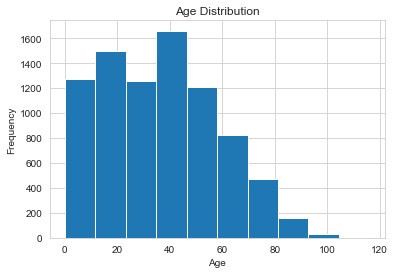

In [1304]:
# Age distribution of the population
plt.hist(census_data['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

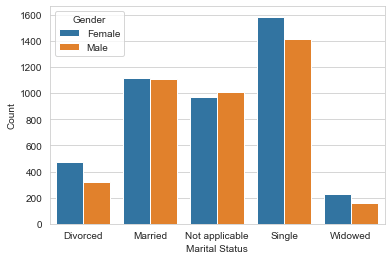

In [1305]:
# Plot for marital status by gender
marital_gender = census_data.groupby(['Marital Status', 'Gender']).size().reset_index(name='count')
sns.barplot(data=marital_gender, x='Marital Status', y='count', hue='Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### 4a. Examining Age distribution

In [1306]:
# Creating a new column called 'Age Group' based on the age of each individual
bins = [-1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-4', '5-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
census_data['Age Group'] = pd.cut(census_data['Age'], bins=bins, labels=labels)
census_data.head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic,41-50
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Not applicable,Female,Student,None,Undecided,11-15
2,1,Regentchain Avenue,Gary,Dale,7,Son,Not applicable,Male,Student,None,Undecided,5-10
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental education officer,None,Methodist,31-40
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public librarian,None,Catholic,31-40
5,2,Regentchain Avenue,Catherine,Grant,19,Daughter,Single,Female,University Student,None,None,16-20
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Not applicable,Female,Student,None,Undecided,16-20
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Not applicable,Female,Student,None,Undecided,11-15
8,3,Regentchain Avenue,Hayley,Hall,60,Head,Married,Female,"Clinical scientist, histocompatibility and imm...",None,Christian,51-60
9,3,Regentchain Avenue,Matthew,Hall,62,Husband,Married,Male,Arts development officer,None,Christian,61-70


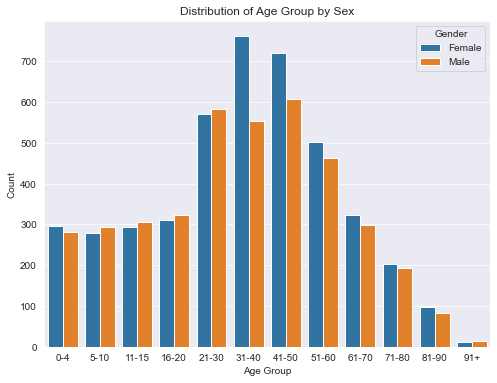

In [1307]:
# Distribution of the age group by sex

# Creating a bar chart of age group by sex
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))

sns.countplot(x='Age Group', hue='Gender', data=census_data)

plt.title('Distribution of Age Group by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()


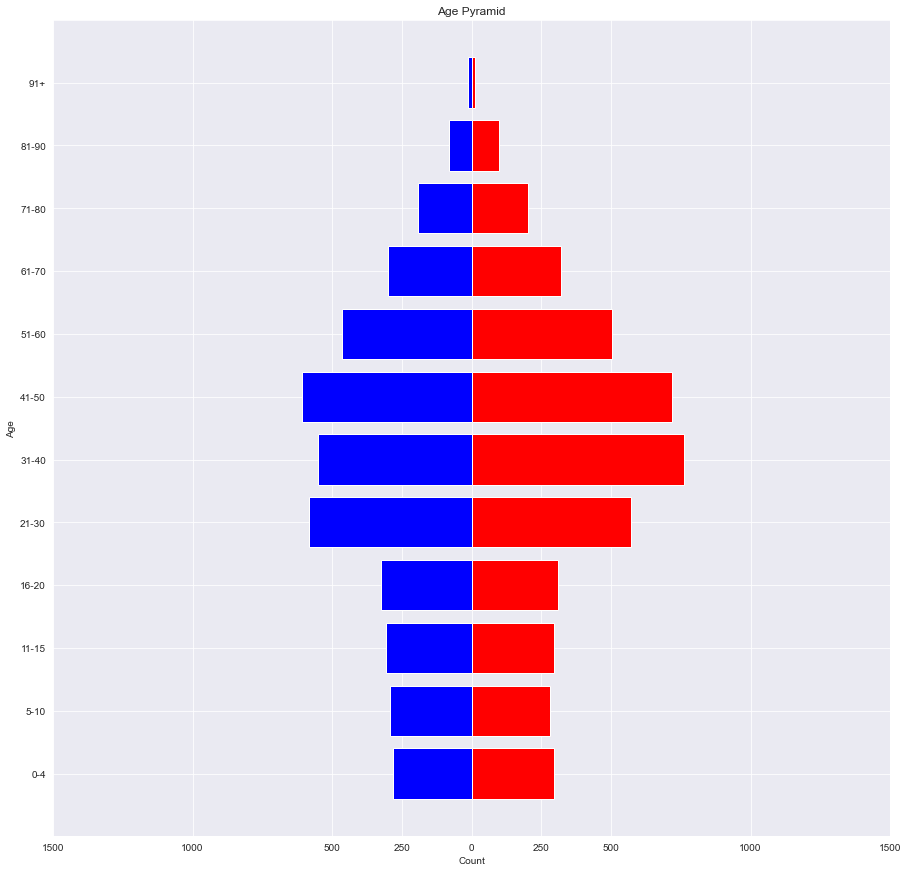

In [1308]:
# Plotting age pyramid of age group

# Calculate age frequencies for males and females
male_age_counts = census_data.loc[census_data['Gender'] == 'Male', 'Age Group'].value_counts().sort_index()
female_age_counts = census_data.loc[census_data['Gender'] == 'Female', 'Age Group'].value_counts().sort_index()

# Creating the age pyramid plot size
fig, ax = plt.subplots(figsize=(15, 15))

# limits and tick labels for x-axis
max_age_count = max(male_age_counts.max(), female_age_counts.max())
ax.set_xlim([-max_age_count, max_age_count])
ax.set_xticks([-1500, -1000, -500, -250, 0, 250, 500, 1000, 1500])
ax.set_xticklabels([1500, 1000, 500, 250, 0, 250, 500, 1000, 1500])

# labels and tick marks for y-axis
ax.set_yticks(np.arange(len(male_age_counts)))
ax.set_yticklabels(male_age_counts.index.astype(str))

# Plotting male and female age distributions
ax.barh(male_age_counts.index, -male_age_counts.values, height=0.8, color='blue')
ax.barh(female_age_counts.index, female_age_counts.values, height=0.8, color='red')

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Age')
ax.set_title('Age Pyramid')

plt.show()


### 4b. Calculating death rate and Birth rate

From the age pyramid it was observe that there was shrinkage moving upwards from '61-70'. life expentancy in the uk is average 80 years (https://ukhsa.blog.gov.uk/2021/03/31/life-expectancy-in-england-in-2020/). so I will assume the shrinkage is caused by death.  Also from the average age of retirement of 77 which I calculated its safe to start getting difference in Age Group band and assuming these are as a result of death since these group of individuals are almost 100% settling in the town.

For the birth rate The birth rate is a measure of the number of births per 1,000 individuals in a given population within a specified time period. So I will take the birth rate of the last three ages (i.e age 0 to age 2) and assume the total population at any give time is current total population minus the total number of individuals in the prior smaller age. Here I am assuming other source or population increase or decrease are same 

In [1309]:
''' Calculating the Death rate per 1000'''

# Select age groups from '61-70' to '91+'
age_groups_dr = census_data[census_data['Age Group'].isin(['61-70', '71-80', '81-90', '91+'])]

# Group by age group and count the number of rows
age_counts_dr = age_groups_dr.groupby('Age Group').size()

# Calculate the difference in row number between each consecutive age group
age_diff_dr = age_counts_dr.diff().iloc[1:]

# Divide the difference by 1000
age_diff_1000 = age_diff_dr / 1000

print(f' Death rate per 1000\n{age_diff_1000.tail(4)}')

print(f' Death rate \n {age_diff_dr.tail(4)}')


 Death rate per 1000
Age Group
61-70    0.620
71-80   -0.225
81-90   -0.215
91+     -0.154
dtype: float64
 Death rate 
 Age Group
61-70    620.0
71-80   -225.0
81-90   -215.0
91+     -154.0
dtype: float64


In [1310]:
# Calculating final death rate per 1000 as average of the last three
death_rate_per_1000 = age_diff_dr.tail(3).mean()
print(f' Death rate per 1000 is {death_rate_per_1000 * -1:.2f}')

 Death rate per 1000 is 198.00


In [1311]:
''' Calculating birth rates'''

# Calculate total number of people with age 2
age_2_count = len(census_data[census_data['Age'] == 2])

# Calculate total number of rows with age 0 or 1
age_0_1_count = len(census_data[census_data['Age'].isin([0, 1])])

# Calculate total number of rows in the dataframe
total_count = len(census_data)

# Calculate difference between total_count and age_0_1_count
diff_2 = total_count - age_0_1_count

# Calculate birth rate
birth_rate_2years_ago = (age_2_count / diff_2) * 1000



# Calculate total number of people with age 1
age_1_count = len(census_data[census_data['Age'] == 1])

# Calculate total number of rows with age 0
age_0_count = len(census_data[census_data['Age'].isin([0])])

# Calculate difference between total_count and age_0_count
diff_1 = total_count - age_0_count

# Calculate birth rate
birth_rate_1year_ago = (age_1_count / diff_1) * 1000

# Calculate total number of people with age 0
age_0_count = len(census_data[census_data['Age'] == 0])

# Calculate birth rate
birth_rate_current = (age_0_count / total_count) * 1000

# Print birth rate
print(f"Birth rate two years ago is {birth_rate_2years_ago:.2f} per 1000 people.")
print(f"Birth rate for one year ago is {birth_rate_1year_ago:.2f} per 1000 people.")
print(f"Birth rate for current year is {birth_rate_current:.2f} per 1000 people.")


Birth rate two years ago is 11.95 per 1000 people.
Birth rate for one year ago is 10.14 per 1000 people.
Birth rate for current year is 10.62 per 1000 people.


### 4c. Examining the number of University Student, Retirement age and Minimum Age for School

In [1312]:
''' Getting the number of university students in the population'''

num_university_student = len(census_data[census_data['Occupation'] == 'University Student'])

print(f'Number of University student is {num_university_student}')

Number of University student is 533


In [1313]:
''' Creating a new column Employment Status so as to get a distinct value for retired and employed'''

# Convert "Occupation" column to lowercase for case-insensitive matching
census_data['Occupation'] = census_data['Occupation'].str.lower()

# Create "Employment Status" column based on "Occupation" values
census_data['Employment Status'] = 'Employed'  # default value

census_data.loc[census_data['Occupation'].str.contains('student'), 'Employment Status'] = 'Student'

census_data.loc[census_data['Occupation'].str.contains('retired'), 'Employment Status'] = 'Retired'

census_data.loc[census_data['Occupation'] == 'unemployed', 'Employment Status'] = 'Unemployed'

census_data.loc[census_data['Occupation'] == 'university student', 'Employment Status'] = 'University Student'

census_data.loc[census_data['Occupation'] == 'child', 'Employment Status'] = 'Child'

census_data['Occupation'] = census_data['Occupation'].str.title()

In [1314]:
census_data['Employment Status'].unique()

array(['Employed', 'Student', 'University Student', 'Unemployed', 'Child',
       'Retired'], dtype=object)

In [1315]:
census_data.head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Status
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field Trials Officer,None,Catholic,41-50,Employed
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Not applicable,Female,Student,None,Undecided,11-15,Student
2,1,Regentchain Avenue,Gary,Dale,7,Son,Not applicable,Male,Student,None,Undecided,5-10,Student
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental Education Officer,None,Methodist,31-40,Employed
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public Librarian,None,Catholic,31-40,Employed
5,2,Regentchain Avenue,Catherine,Grant,19,Daughter,Single,Female,University Student,None,None,16-20,University Student
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Not applicable,Female,Student,None,Undecided,16-20,Student
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Not applicable,Female,Student,None,Undecided,11-15,Student
8,3,Regentchain Avenue,Hayley,Hall,60,Head,Married,Female,"Clinical Scientist, Histocompatibility And Imm...",None,Christian,51-60,Employed
9,3,Regentchain Avenue,Matthew,Hall,62,Husband,Married,Male,Arts Development Officer,None,Christian,61-70,Employed


In [1316]:
''' Getting avegage age of retirement'''
mean_age_retired = census_data.loc[census_data['Employment Status'] == 'Retired', 'Age'].mean()

print(f'Average Age of Retirement is: {round(mean_age_retired)}')


Average Age of Retirement is: 77


In [1317]:
''' Getting minimum age for children to start school'''
min_age_student = census_data.loc[census_data['Employment Status'] == 'Student', 'Age'].min()

print(f'Minimum Age for school is: {round(min_age_student)}')

Minimum Age for school is: 5


In [1318]:
print(f'Number of University student is {num_university_student}')

print(f'Average Age of Retirement is: {round(mean_age_retired)}')

print(f'Minimum Age for school is: {round(min_age_student)}')

Number of University student is 533
Average Age of Retirement is: 77
Minimum Age for school is: 5


### 4d. Examining Unemployment trend

<AxesSubplot:xlabel='Employment Status', ylabel='Age Group'>

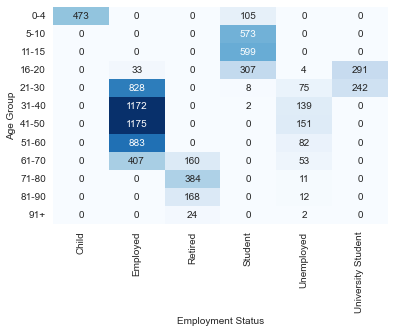

In [1319]:
import pandas as pd
import seaborn as sns

# Create a pivot table with age as rows and employment status as columns
pivot_table = pd.pivot_table(census_data, index='Age Group', columns='Employment Status', values='Age', aggfunc='count')

# Create a heatmap visualization of the pivot table
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', cbar=False)


Text(0, 0.5, 'Count')

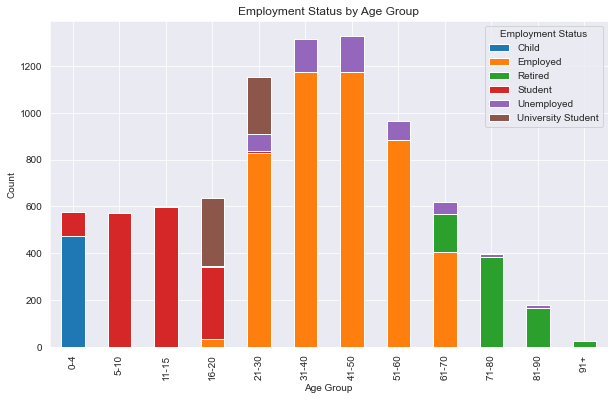

In [1320]:

# Group the data by age group and employment status and count the number of occurrences
grouped_data = census_data.groupby(['Age Group', 'Employment Status'])['Age'].count().reset_index()

# Pivot the data to make employment status the columns
pivoted_data = grouped_data.pivot(index='Age Group', columns='Employment Status', values='Age')

# Create a stacked bar chart of the data
ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(10,6))

# Set the title and axis labels
ax.set_title('Employment Status by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')


When calculating the unemployment rate minimum age to start gain employment is 16 years. 
https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/methodologies/aguidetolabourmarketstatistics


In [1321]:
# Create a copy of the original dataframe with individuals aged 15 and below removed
# https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/methodologies/aguidetolabourmarketstatistics
workforce_population = census_data[census_data['Age'] >= 16].copy()

# Group by employment status
count_of_employment_status = workforce_population.groupby('Employment Status').size()

# Calculate the total number of individuals
total_individuals = count_of_employment_status.sum()

# Calculate the unemployment rate
unemployment_rate = (count_of_employment_status.loc['Unemployed'] / total_individuals) * 100

# Print the unemployment rate
print(f"The Unemployment rate for the town is: {unemployment_rate.round(2)}%")

The Unemployment rate for the town is: 7.98%


#### Unemployment rate by Age group

In [1322]:
# Create a copy of the original dataframe without rows with age less than 16 age group
workforce_age_group = census_data[census_data['Age Group'].isin(['16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])].copy()

# Group by age group and employment status
employment_status_ageGroup = workforce_age_group.groupby(['Age Group', 'Employment Status']).count()['Age'].unstack()

# Calculate the total number of individuals in each age group
age_group_totals = workforce_age_group.groupby('Age Group').count()['Age']

# Calculate the unemployment rate for each age group
unemployment_rates = employment_status_ageGroup['Unemployed'] / age_group_totals

# Print the unemployment rates for each age group
print(f"Unemployment rate for each age group is {((unemployment_rates.tail(9))*100).round(2)}%")


Unemployment rate for each age group is Age Group
16-20     0.63
21-30     6.50
31-40    10.59
41-50    11.39
51-60     8.50
61-70     8.55
71-80     2.78
81-90     6.67
91+        NaN
dtype: float64%


### 4e. Examining Religion trend

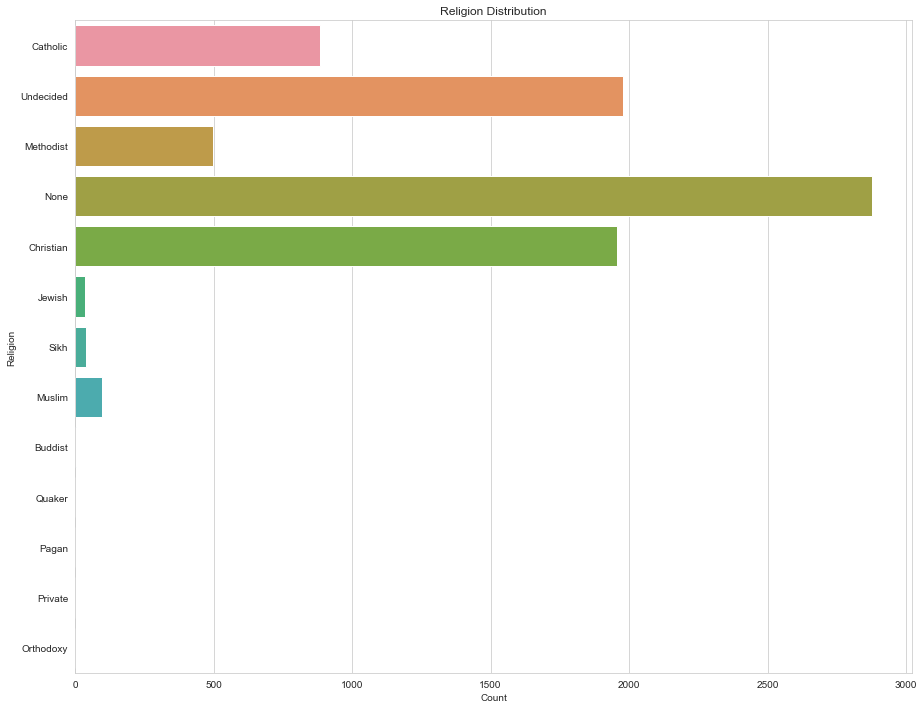

In [1323]:
''' Using bar chart to visualise religion'''

sns.set_style('whitegrid')

plt.figure(figsize=(15, 12))
sns.countplot(data=census_data, y='Religion')
plt.title('Religion Distribution')
plt.xlabel('Count')
plt.ylabel('Religion')
plt.show()


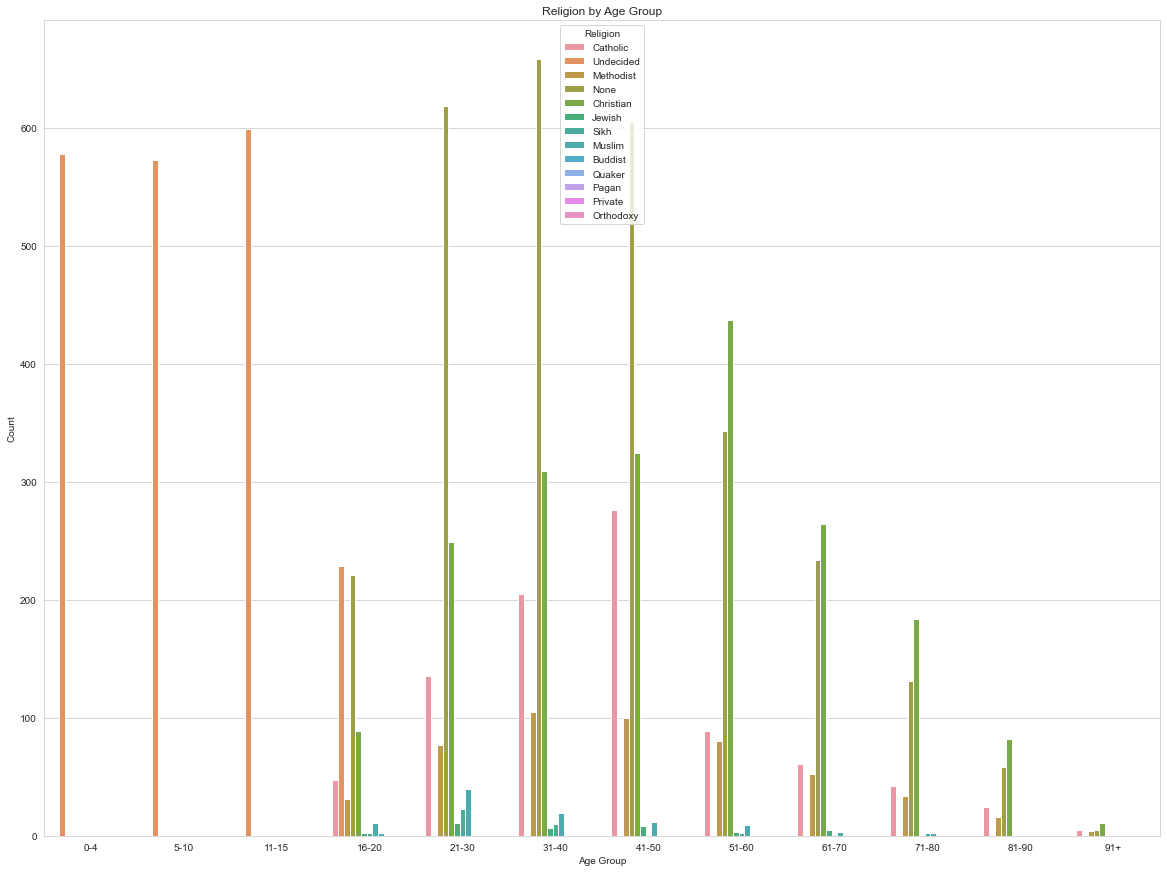

In [1324]:
''' Using a bar chart to see which religion is common among certain age group'''

# setting grid and figsize
sns.set_style('whitegrid')
plt.figure(figsize=(20, 15))


sns.countplot(x='Age Group', hue='Religion', data=census_data)

# Set titles
plt.title('Religion by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

##### Computing the statistics of age grouped by religion



In [1325]:
# Using decribe method to get the 
census_data['Age'].groupby(census_data['Religion']).describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Buddist,3.0,29.666667,18.475209,19.0,19.00,19.0,35.0,51.0
Catholic,885.0,44.114124,16.228483,18.0,34.00,42.0,51.0,102.0
Christian,1956.0,49.942229,18.229041,18.0,36.00,51.0,62.0,116.0
Jewish,36.0,39.611111,14.959522,19.0,27.00,36.5,48.0,70.0
Methodist,499.0,45.665331,17.869738,18.0,32.00,43.0,57.0,100.0
Muslim,97.0,34.556701,14.879354,18.0,24.00,29.0,42.0,94.0
None,2878.0,41.851286,16.789361,18.0,28.00,40.0,52.0,107.0
Orthodoxy,1.0,45.000000,NaN,45.0,45.00,45.0,45.0,45.0
Pagan,1.0,102.000000,NaN,102.0,102.00,102.0,102.0,102.0


In [1326]:
# Computing statistical mode of the data
'''reference: https://statisticsglobe.com/calculate-mode-group-python'''

census_data.groupby('Religion')['Age'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda_0>': 'mode'})



,mean,median,mode
Religion,,,
Buddist,29.666667,19.0,19
Catholic,44.114124,42.0,41
Christian,49.942229,51.0,51
Jewish,39.611111,36.5,27
Methodist,45.665331,43.0,36
Muslim,34.556701,29.0,20
None,41.851286,40.0,19
Orthodoxy,45.000000,45.0,45
Pagan,102.000000,102.0,102


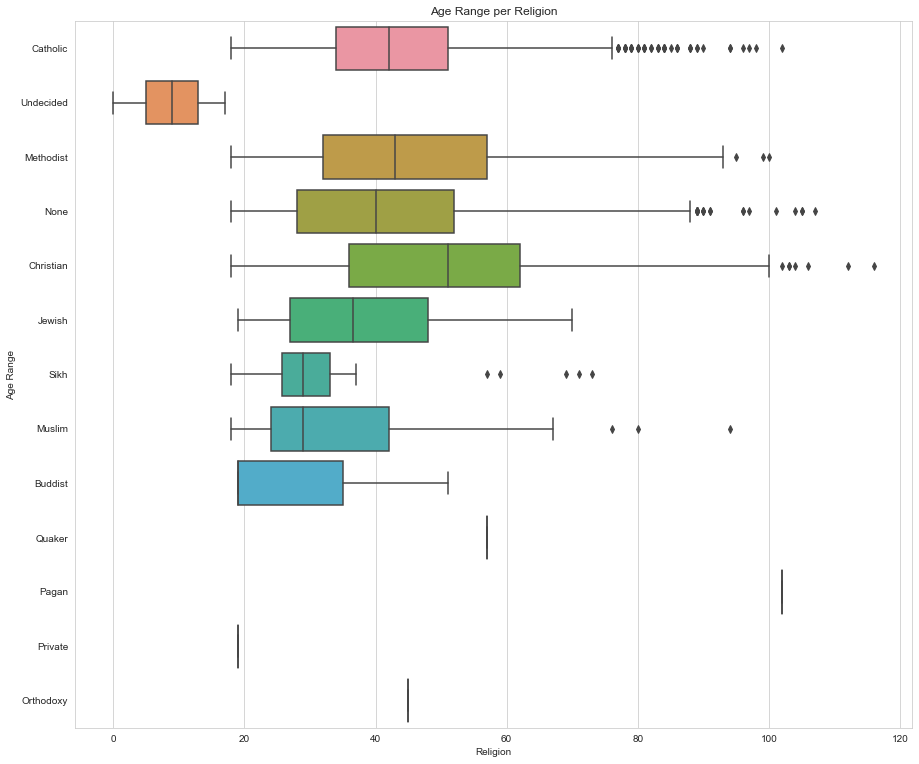

In [1327]:

fig, ax = plt.subplots(figsize=(15, 13))

# Calculating the age range of the data 
religion_age_range = census_data.groupby('Religion')['Age'].agg(lambda x: max(x) - min(x)).reset_index()

# Creating the boxplot
sns.boxplot(x='Age', y='Religion', data=census_data)


# Set title and labels
plt.title('Age Range per Religion')
plt.xlabel('Religion')
plt.ylabel('Age Range')

# Show plot
plt.show()


#### Religion Adoption rate by chidren
I will check the rate children take their parents religion especially that of the head of house. If the rate is quite I will assume children take after their parents religion and get future religions of under 18 children

In [1328]:
# filter the data for rows with age >= 18 and 'relationship to head of house' column to be 'Daughter', 'Son', 'Adopted Daughter', 'Adopted Son', 'Step-Son' or 'Step-Daughter'
filtered_data = census_data[(census_data['Age'] >= 18) & census_data['Relationship to Head of House'].isin(['Daughter', 'Son', 'Adopted Daughter', 'Adopted Son', 'Step-Son', 'Step-Daughter'])]

# get the count of filtered rows
total_count = len(filtered_data)

# initialize the count of matching rows to 0
religion_adoption_count = 0

# loop through each row and check if it matches the conditions
for index, row in filtered_data.iterrows():
    religion = row['Religion']
    street = row['Street']
    house_number = row['House Number']
    head_of_house_religion = census_data[(census_data['Street'] == street) & (census_data['House Number'] == house_number) & (census_data['Relationship to Head of House'] == 'Head')]['Religion'].iloc[0]
    if religion == head_of_house_religion:
        religion_adoption_count += 1

# calculate the matching rate
religion_adoption_rate = religion_adoption_count / total_count

print(f'Religion adoption count for population is: {religion_adoption_rate*100:.2f}%')


Religion adoption count for population is: 78.22%


With Religion adoption rate s 78.22% its safe to assume children will take their parents religion when they are adults

In [1329]:
'''I created a new column with future religion of children and current religion of adults '''

# Get the unique head of household details
head_of_house_df = census_data[(census_data['Relationship to Head of House'] == 'Head')][['Surname', 'Street', 'House Number', 'Religion']].drop_duplicates()

# Loop through the rows and update the 'prospective religion and current religion' column
for i, row in census_data.iterrows():
    if row['Religion'] == 'Undecided':
        matching_head_of_house = head_of_house_df[(head_of_house_df['Surname'] == row['Surname']) & (head_of_house_df['Street'] == row['Street']) & (head_of_house_df['House Number'] == row['House Number'])]
        if not matching_head_of_house.empty:
            census_data.at[i, 'Prospective Religion and Current Religion'] = matching_head_of_house['Religion'].values[0]
        else:
            census_data.at[i, 'Prospective Religion and Current Religion'] = 'undecided'
    else:
        census_data.at[i, 'Prospective Religion and Current Religion'] = row['Religion']

print(census_data['Prospective Religion and Current Religion'].unique())

['Catholic' 'Methodist' 'None' 'Christian' 'undecided' 'Jewish' 'Sikh'
 'Muslim' 'Buddist' 'Quaker' 'Pagan' 'Undecided' 'Private' 'Orthodoxy']


In [1330]:
# Using decribe method to get the statistics

census_data['Age'].groupby(census_data['Prospective Religion and Current Religion']).describe()

,count,mean,std,min,25%,50%,75%,max
Prospective Religion and Current Religion,,,,,,,,
Buddist,3.0,29.666667,18.475209,19.0,19.0,19.0,35.00,51.0
Catholic,1217.0,34.430567,21.179884,0.0,16.0,37.0,47.00,102.0
Christian,2438.0,42.016817,22.949198,0.0,22.0,43.0,59.00,116.0
Jewish,52.0,29.980769,19.347686,0.0,13.5,27.0,43.25,70.0
Methodist,657.0,36.936073,22.107460,0.0,18.0,36.0,53.00,100.0
Muslim,115.0,30.747826,16.411295,0.0,20.5,27.0,39.50,94.0
None,3529.0,35.699065,20.052004,0.0,21.0,34.0,49.00,107.0
Orthodoxy,1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
Pagan,1.0,102.000000,NaN,102.0,102.0,102.0,102.00,102.0


Visualizing both prospective and current religion

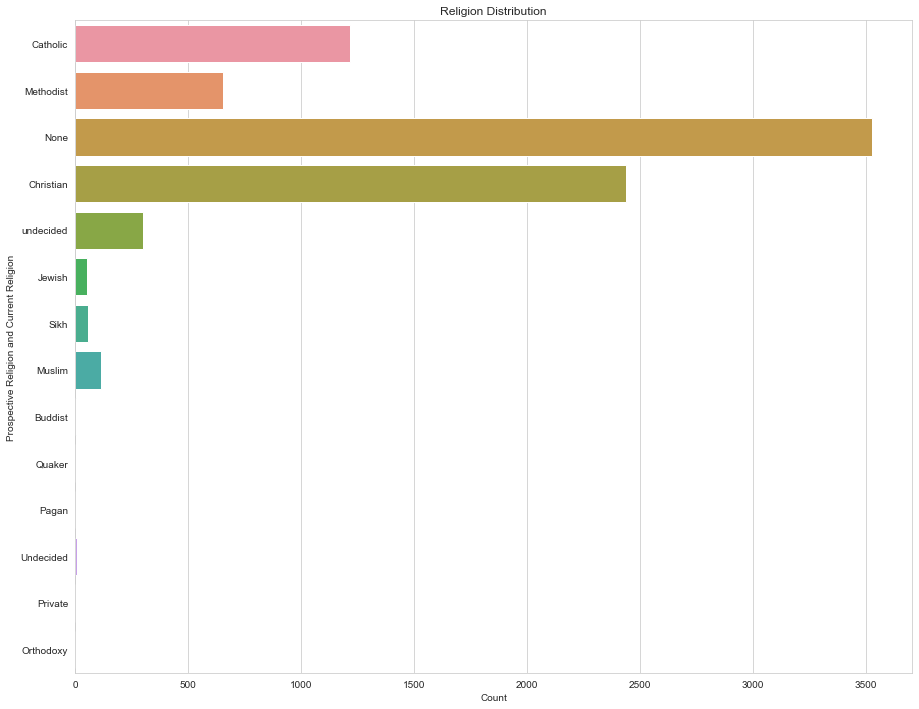

In [1331]:
sns.set_style('whitegrid')

plt.figure(figsize=(15, 12))
sns.countplot(data=census_data, y='Prospective Religion and Current Religion')
plt.title('Religion Distribution')
plt.xlabel('Count')
plt.ylabel('Prospective Religion and Current Religion')
plt.show()

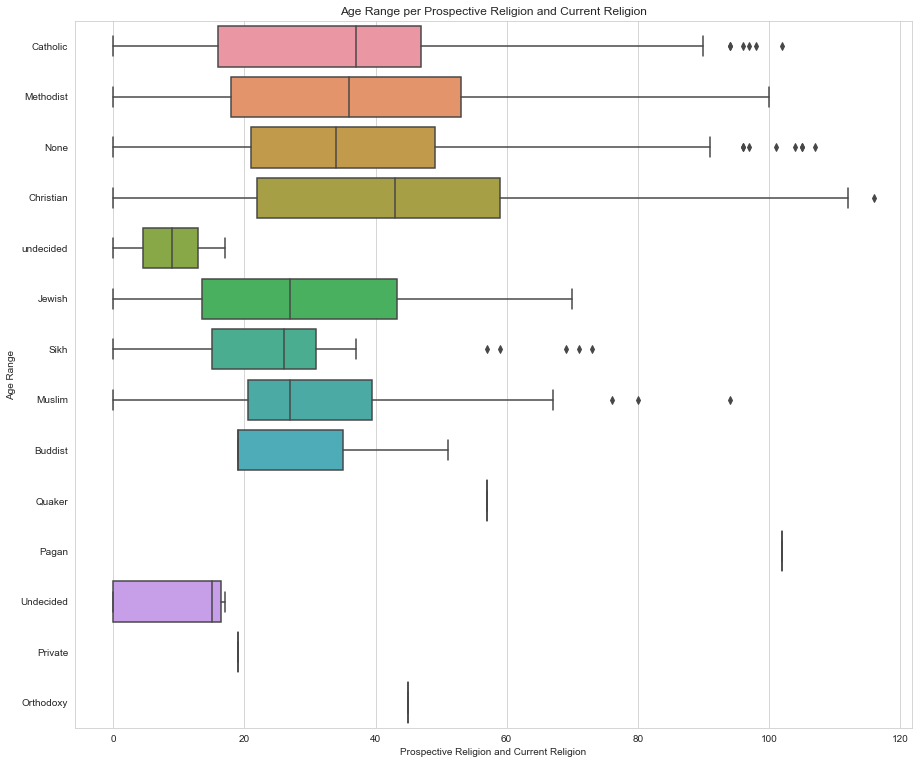

In [1332]:
''' Creating a box plot for age range per religion after prspective adoption'''
fig, ax = plt.subplots(figsize=(15, 13))

# Calculating the age range of the data 
prospective_religion_age_range = census_data.groupby('Prospective Religion and Current Religion')['Age'].agg(lambda x: max(x) - min(x)).reset_index()

# Creating the boxplot
sns.boxplot(x='Age', y='Prospective Religion and Current Religion', data=census_data)


# Set title and labels
plt.title('Age Range per Prospective Religion and Current Religion')
plt.xlabel('Prospective Religion and Current Religion')
plt.ylabel('Age Range')

# Show plot
plt.show()


### 4f. Examining the Marriage and Divorced rate
My approach to this was to get the total number of divorced divided by the total population. I did same for marriage rate.

In [1333]:
# Get rows with marital status as Divorced or Married and DataFrame it
marriage_status_data = census_data[census_data['Marital Status'].isin(['Divorced', 'Married'])]

# Calculate the number of people who are divorced, married or widowed
marital_status_counts = marriage_status_data['Marital Status'].value_counts()

# Calculate the total number of people in the dataset
total_population = len(marriage_status_data)

# Calculate the divorce rate
divorce_rate = marital_status_counts['Divorced'] / total_population

# Calculate the marriage rate
marriage_rate = marital_status_counts['Married'] / total_population

# Print the results
print(f'Divorce rate: {divorce_rate*100:.2f}%')
print(f'Marriage rate: {marriage_rate*100:.2f}%')


Divorce rate: 26.24%
Marriage rate: 73.76%


In [1334]:
''' Calculating number of houses in the town'''

num_of_house = len(census_data.groupby(['House Number', 'Street']))
print(num_of_house)

3064


In [1335]:
houses_df = census_data[['House Number', 'Street']]
houses_df.head()

,House Number,Street
0,1,Regentchain Avenue
1,1,Regentchain Avenue
2,1,Regentchain Avenue
3,2,Regentchain Avenue
4,2,Regentchain Avenue


In [1336]:
num_of_houses = houses_df.drop_duplicates()
print(f'Number of House in the town is {len(num_of_houses)}')

Number of House in the town is 3064


In [1337]:
''' Getting avegage age of divorce'''
mean_age_divorced = census_data.loc[census_data['Marital Status'] == 'Divorced', 'Age'].mean()
print(f'Average Age of Divorce is: {round(mean_age_divorced)} Years')

Average Age of Divorce is: 42 Years


### 4g. Examining Occupancy Level

In [1338]:
# Group by 'House Number' and 'Street' and calculate the total number of individuals in each house
house_group = census_data.groupby(['House Number', 'Street'])['Age'].count()

# Calculate the average number of individuals per house
occupancy_level = house_group / 1

# Reset the index of the resulting dataframe and rename the column
occupancy_level = occupancy_level.reset_index(name='occupancy_level')

# Merge the occupancy level data with the original census_data dataframe
census_data_adjusted = pd.merge(census_data, occupancy_level, on=['House Number', 'Street'], how='left')

census_data_adjusted.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Employment Status,Prospective Religion and Current Religion,occupancy_level
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field Trials Officer,None,Catholic,41-50,Employed,Catholic,3.0
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Not applicable,Female,Student,None,Undecided,11-15,Student,Catholic,3.0
2,1,Regentchain Avenue,Gary,Dale,7,Son,Not applicable,Male,Student,None,Undecided,5-10,Student,Catholic,3.0
3,2,Regentchain Avenue,Edward,Grant,40,Head,Married,Male,Environmental Education Officer,None,Methodist,31-40,Employed,Methodist,5.0
4,2,Regentchain Avenue,Elizabeth,Grant,35,Wife,Married,Female,Public Librarian,None,Catholic,31-40,Employed,Catholic,5.0


In [1339]:
# Group the data by street and count the number of occupants per street
occupancy_by_street = census_data_adjusted.groupby('Street')['occupancy_level'].sum()

# Sort the data by descending order of occupancy level and select the top 20 streets
top_20_streets = occupancy_by_street.sort_values(ascending=False)[:20]
top_20_streets

Street
Davies Avenue             3434.0
Willow Road               2038.0
Harvey Road               1710.0
Cambridge Street          1600.0
ExcaliburBellsby Drive    1303.0
Farthing Crescent         1221.0
Canterbury Well            931.0
Chan Estate                881.0
November Falls             871.0
CherryChestnut Drive       801.0
Singh Burgs                707.0
Aethelred Heights          705.0
Leach Tunnel               680.0
Squirrel Street            639.0
Ward Avenue                571.0
Clark Street               559.0
Pendragon Lane             546.0
Brady Creek                526.0
Murray Drive               515.0
Khan Village               515.0
Name: occupancy_level, dtype: float64

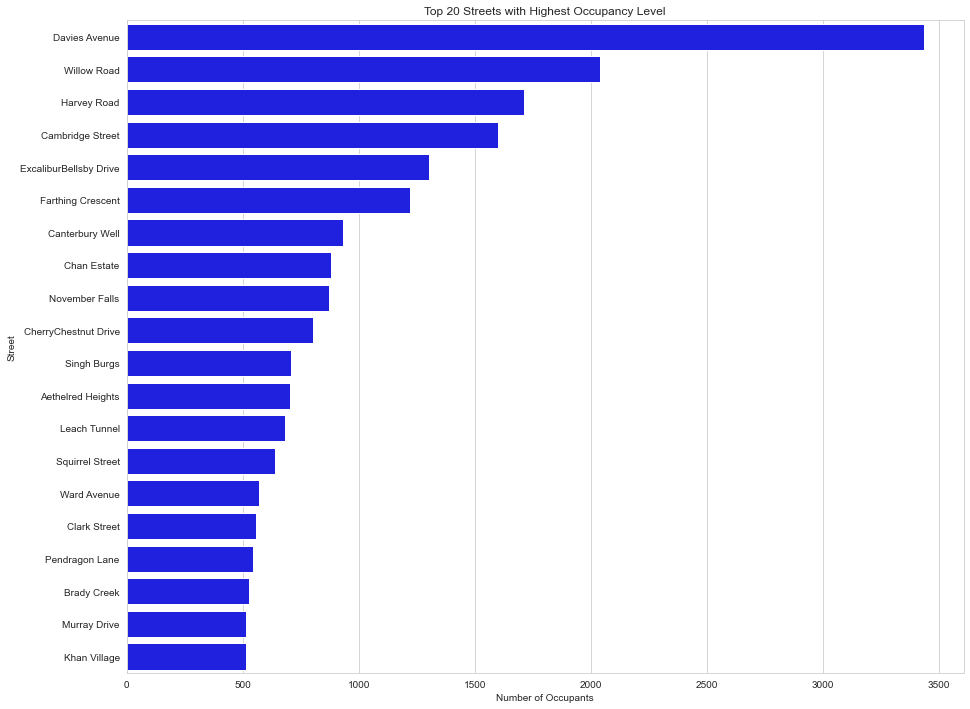

In [1340]:
# Group the data by street and count the number of occupants per street
occupancy_by_street = census_data_adjusted.groupby('Street')['occupancy_level'].sum()

# Sort the data by descending order of occupancy level and select the top 20 streets
top_20_streets = occupancy_by_street.sort_values(ascending=False)[:20]

# Create a horizontal bar chart
plt.figure(figsize=(15, 12))
sns.barplot(x=top_20_streets.values, y=top_20_streets.index, color='b')

# Set the plot title and axis labels
plt.title('Top 20 Streets with Highest Occupancy Level')
plt.xlabel('Number of Occupants')
plt.ylabel('Street')

# Display the plot
plt.show()

In [1341]:
''' Calculating number of lodgers'''
num_of_lodgers = len(census_data[census_data['Relationship to Head of House'] == 'Lodger'])

print(f"Number of Lodgers: {num_of_lodgers}")


Number of Lodgers: 880


In [1342]:
percent_lodgers = num_of_lodgers/ len(census_data) * 100
print(f"Percentage of lodgers : {percent_lodgers:.2f}%")

Percentage of lodgers : 10.50%


In [1343]:
''' Calculating number of visitors'''
num_of_lodgers = len(census_data[census_data['Relationship to Head of House'] == 'Visitor'])

print(f"Number of Visitors: {num_of_lodgers}")

Number of Visitors: 21
